In [ ]:
### Correlation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)


,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


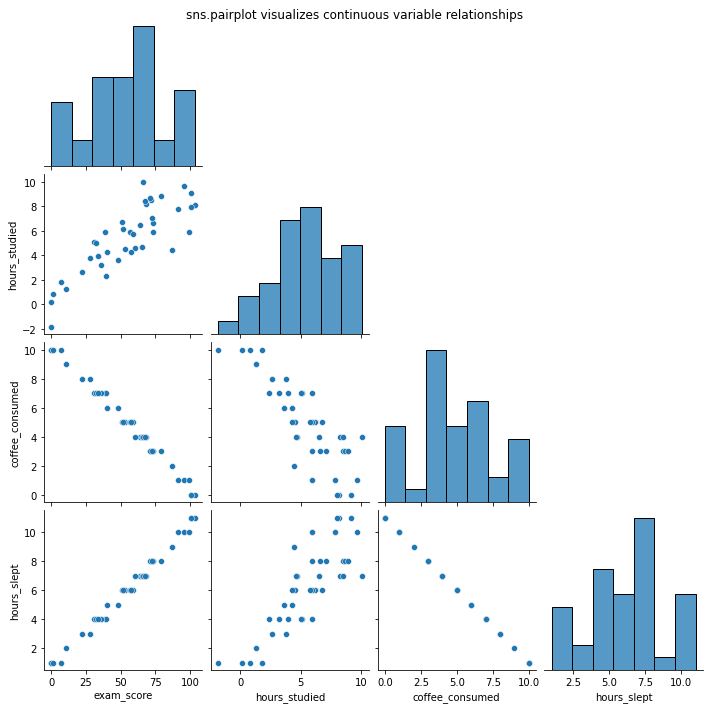

In [2]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

In [10]:
### Pre-set Values

n = df.shape[0]     # number of observations

degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary

conf_interval = .95 # desired confidence interval

# alpha = 0.05
alpha = 1 - conf_interval


40


### Setting up the Test for Correlation

# Number of hours studied
# Exam score 

$H_0$ - No linear relationship between number of hours studied and the exam score
$H_a$ - There is a linear relationship between number of hours studied and the exam score



In [9]:
## Retrieve the x and y values

x = df.hours_studied 
y = df.exam_score

# A function that will find the standard deviation of a set a values 
# First it calculates the variance 

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

# Apply the results to the formula for Pearson's r

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

# The Pearson's r value is r_xy

0.8351498542413306

In [8]:
### Find a p-value 

t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

### t-statistic for exam scores and hours studied 
### calculated with (40 - 2) = 38 degrees of freedom 



9.359998377263368

In [11]:
## Find the p-value based on the t-statistic

# t-statistic (t)
# degrees of freedom (degf)

# Doubled the p-value
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p





2.0762953315463266e-11

In [12]:
# Compare alpha 

p < alpha



True

In [ ]:
### Conclusion

Reject the null hypothesis
Reject that there is no linear relationship 
Reject that there is no correlation 




<AxesSubplot:xlabel='hours_studied', ylabel='exam_score'>

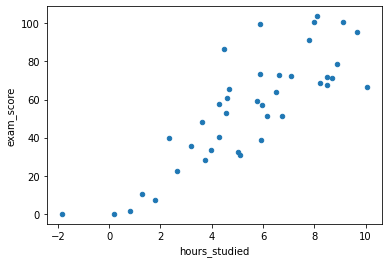

In [16]:
### A visualization of exam scores vs hours studied

df.plot.scatter(y = 'exam_score', x='hours_studied')



## Use scipy's ```stats``` module

#### Back tick key is to the left of the 1 key

```python
def my_function():
```


```scipy```

In [19]:
# stats submodule of scipy
# pearson 
# defining x variable
# defining y variable

# Return:
# correlation [-1 and 1]
# P value 
#stats.pearsonr(x,y)

corr, p = stats.pearsonr(x, y)
corr, p

(0.8351498542413305, 2.0762953315463534e-11)

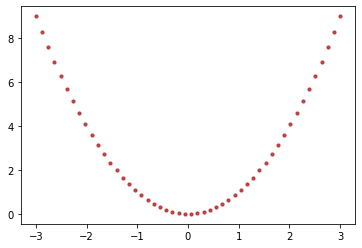

In [20]:
### Non-linear Relationship

# Scatter plot
x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x, y, s=10, c='firebrick', alpha=.8)



In [21]:


r, p = stats.pearsonr(x, y)
print(f'The Pearson correlation coefficient = {r:.5f}')
print(f'The associated p-value = {p:.1f}')


The Pearson correlation coefficient = -0.00000
The associated p-value = 1.0


Text(8, 80, 'r = -0.994')

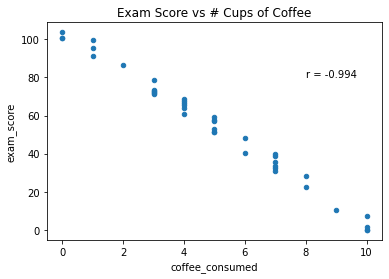

In [22]:
### Coffee consumed and Exam Score

# The Pearson's r and p-value
r, p = stats.pearsonr(df.coffee_consumed, df.exam_score)

# A scatter plot
df.plot.scatter('coffee_consumed', 'exam_score')

# Format is 'y variable vs x variable'
plt.title('Exam Score vs # Cups of Coffee')

# Display the Pearson's r coefficient on the graph 
plt.text(8, 80, f'r = {r:.3f}')




In [23]:
# Pearson's r and p value for the relationship between hours_slept and coffee_consumed

r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)

# Pearson's r and p value for the relationship between hours_slept and exam_score

r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)



print('Correlation between hours slept and coffee consumed')
print(f'  r = {r_sleep_coffee:.3f}')

print('Correlation between hours slept and exam score')
print(f'  r = {r_sleep_score:.3f}')

# hours slept and the exam score
# hours slept and coffee consumed


Correlation between hours slept and coffee consumed
  r = -1.000
Correlation between hours slept and exam score
  r = 0.994


Text(1, 63, 'p = 0.000000e+00')

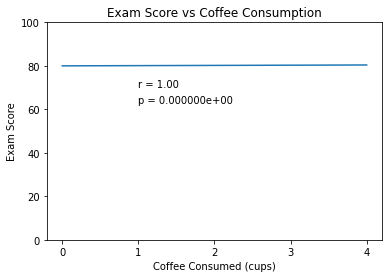

In [24]:
### Example - Scale of a linear relationship 

# Assign data values
cups_of_coffee = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

# calculate Pearson's R and the p-value
r, p = stats.pearsonr(cups_of_coffee, exam_score)

# Plot Exam score vs. Coffee consumed
plt.plot(cups_of_coffee, exam_score)
plt.title('Exam Score vs Coffee Consumption')
plt.ylim(0, 100)
plt.xticks(range(5))
plt.xlabel('Coffee Consumed (cups)')
plt.ylabel('Exam Score')

plt.text(1, 70, f'r = {r:.2f}')
plt.text(1, 63, f'p = {p:e}')


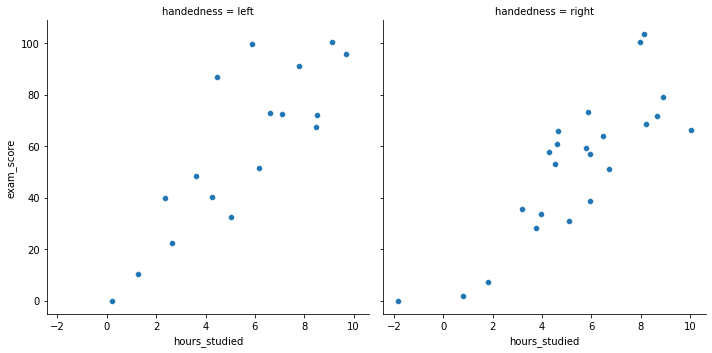

In [27]:
### Controlling for variable



import seaborn as sns

sns.relplot(data=df, y='exam_score', x='hours_studied' , col='handedness')



In [29]:
# Filter by handedness variable
# Lefties are left-handed
# Righties are right-handed 


lefties = df[df.handedness == 'left']
righties = df[df.handedness == 'right']



In [30]:


r, p = stats.pearsonr(lefties.exam_score, lefties.hours_studied)
print('Lefties')
print('  r =', r)
print('  p =', p)



     


Lefties
  r = 0.8389846518512477
  p = 2.5617236824813875e-05


In [31]:
r, p = stats.pearsonr(righties.exam_score, righties.hours_studied)
print('Righties')
print('  r =', r)
print('  p =', p)




Righties
  r = 0.8407115600383273
  p = 5.114047317102283e-07


#### Explore the size and magnitude of Pearson's r

https://www.rossmanchance.com/applets/2021/guesscorrelation/GuessCorrelation.html


